<a href="https://www.kaggle.com/code/lalit7881/road-accident-data-for-analysis?scriptVersionId=295015666" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-accident-dataset/sample_submission.csv
/kaggle/input/road-accident-dataset/train.csv
/kaggle/input/road-accident-dataset/test.csv


## Import dataset

In [2]:
train_path = "/kaggle/input/road-accident-dataset/train.csv"
test_path = "/kaggle/input/road-accident-dataset/test.csv"
sample_path = "/kaggle/input/road-accident-dataset/sample_submission.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
sample_df = pd.read_csv(sample_path)


In [3]:
train_df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [4]:
train_df.tail()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
517749,517749,highway,4,0.10,70,daylight,foggy,True,True,afternoon,False,False,2,0.32
517750,517750,rural,4,0.47,35,daylight,rainy,True,True,morning,False,False,1,0.26
517751,517751,urban,4,0.62,25,daylight,foggy,False,False,afternoon,False,True,0,0.19
517752,517752,highway,3,0.63,25,night,clear,True,False,afternoon,True,True,3,0.51
517753,517753,highway,2,0.31,45,dim,rainy,False,True,afternoon,True,True,2,0.22


In [5]:
train_df.shape          # rows, columns
train_df.columns        # column names

Index(['id', 'road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting',
       'weather', 'road_signs_present', 'public_road', 'time_of_day',
       'holiday', 'school_season', 'num_reported_accidents', 'accident_risk'],
      dtype='object')

In [6]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [7]:
train_df.dtypes

id                          int64
road_type                  object
num_lanes                   int64
curvature                 float64
speed_limit                 int64
lighting                   object
weather                    object
road_signs_present           bool
public_road                  bool
time_of_day                object
holiday                      bool
school_season                bool
num_reported_accidents      int64
accident_risk             float64
dtype: object

In [8]:
train_df.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849974,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


In [9]:
train_df.describe(include='object')  # categorical summary

,road_type,lighting,weather,time_of_day
count,517754,517754,517754,517754
unique,3,3,3,3
top,highway,dim,foggy,morning
freq,173672,183826,181463,173410


In [10]:
train_df.isnull().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

In [11]:
train_df.isnull().mean() * 100   # % missing

id                        0.0
road_type                 0.0
num_lanes                 0.0
curvature                 0.0
speed_limit               0.0
lighting                  0.0
weather                   0.0
road_signs_present        0.0
public_road               0.0
time_of_day               0.0
holiday                   0.0
school_season             0.0
num_reported_accidents    0.0
accident_risk             0.0
dtype: float64

In [12]:
train_df.duplicated().sum()

np.int64(0)

In [13]:
train_df.drop_duplicates(inplace=True)

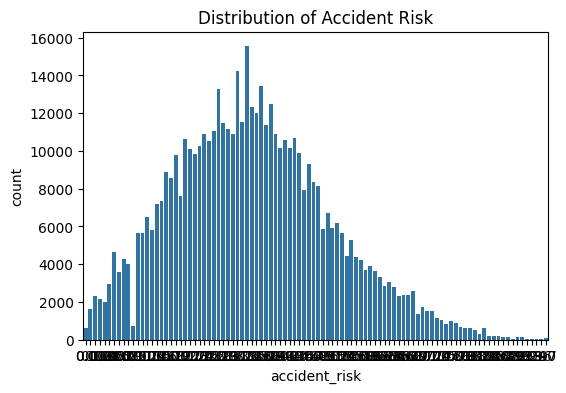

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='accident_risk', data=train_df)
plt.title("Distribution of Accident Risk")
plt.show()


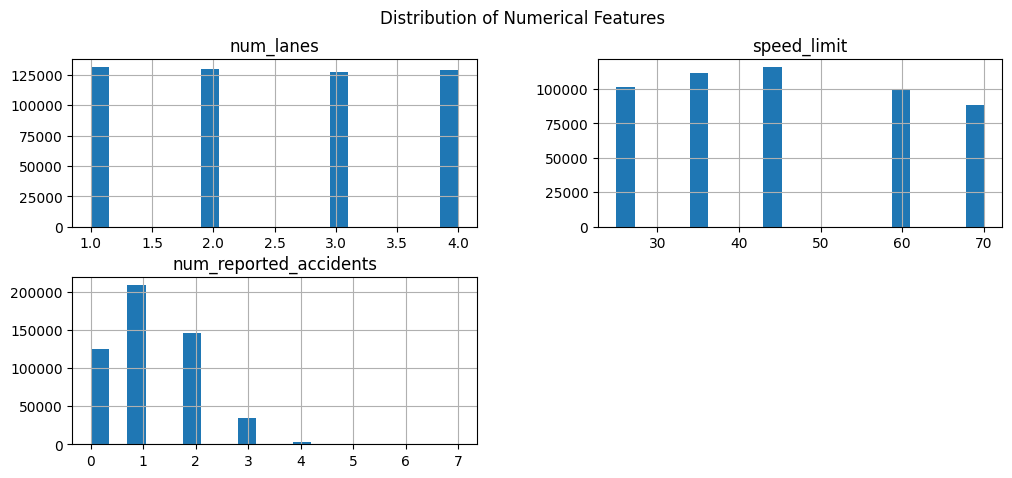

In [15]:
num_cols = ['num_lanes', 'speed_limit', 'num_reported_accidents']

train_df[num_cols].hist(bins=20, figsize=(12,5))
plt.suptitle("Distribution of Numerical Features")
plt.show()


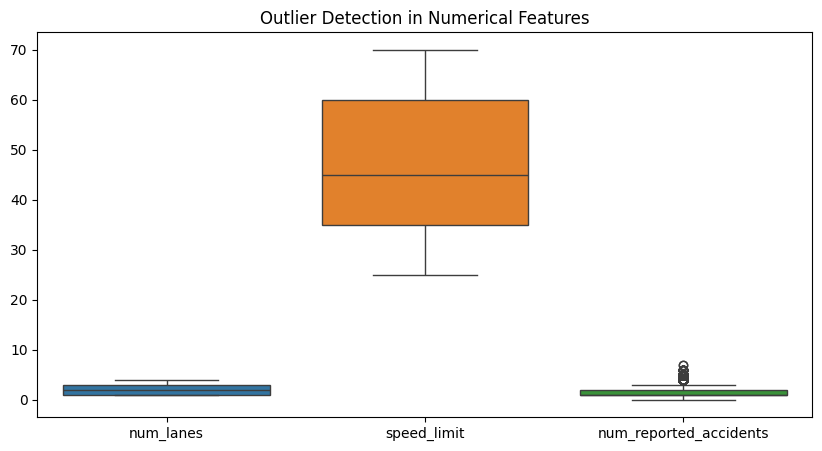

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train_df[num_cols])
plt.title("Outlier Detection in Numerical Features")
plt.show()


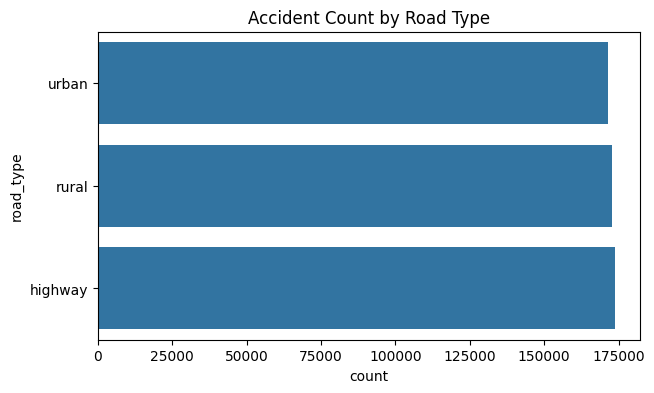

In [17]:
plt.figure(figsize=(7,4))
sns.countplot(y='road_type', data=train_df)
plt.title("Accident Count by Road Type")
plt.show()


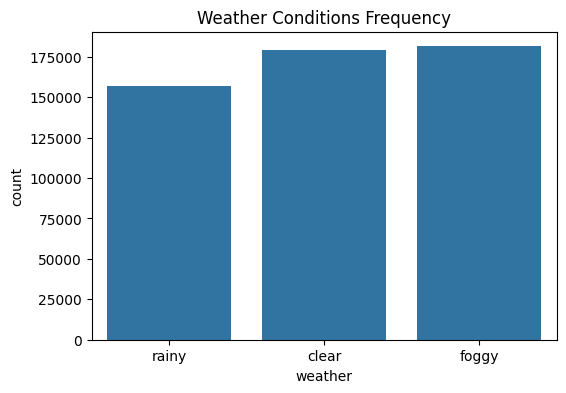

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='weather', data=train_df)
plt.title("Weather Conditions Frequency")
plt.show()


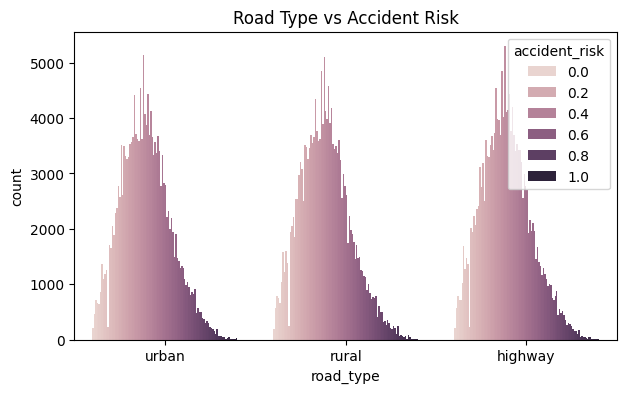

In [19]:
plt.figure(figsize=(7,4))
sns.countplot(x='road_type', hue='accident_risk', data=train_df)
plt.title("Road Type vs Accident Risk")
plt.show()


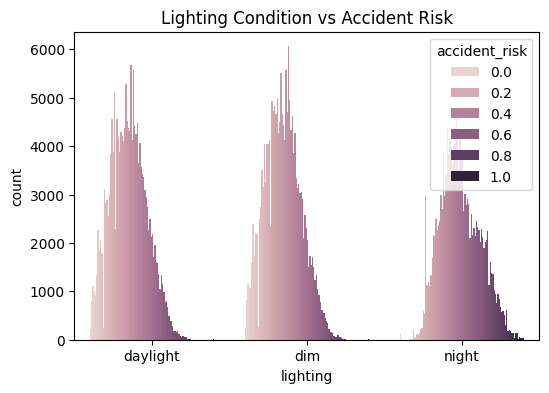

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x='lighting', hue='accident_risk', data=train_df)
plt.title("Lighting Condition vs Accident Risk")
plt.show()


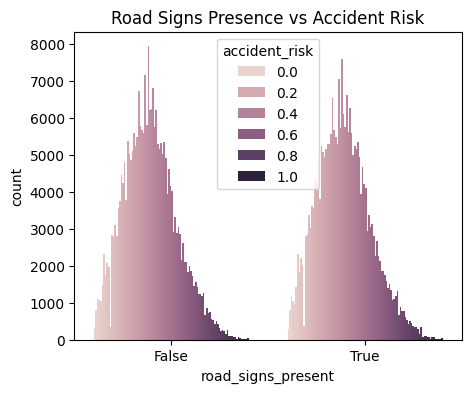

In [21]:
plt.figure(figsize=(5,4))
sns.countplot(x='road_signs_present', hue='accident_risk', data=train_df)
plt.title("Road Signs Presence vs Accident Risk")
plt.show()


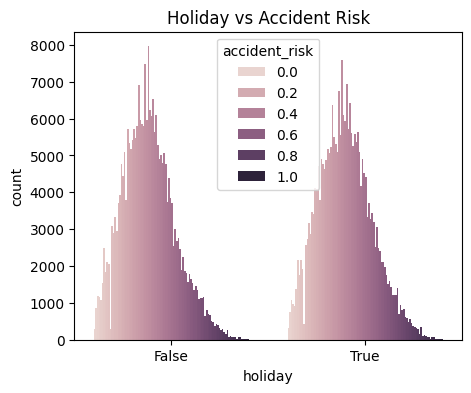

In [22]:
plt.figure(figsize=(5,4))
sns.countplot(x='holiday', hue='accident_risk', data=train_df)
plt.title("Holiday vs Accident Risk")
plt.show()


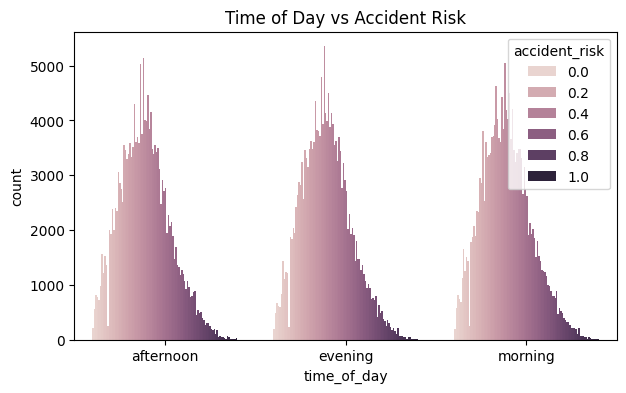

In [23]:
plt.figure(figsize=(7,4))
sns.countplot(x='time_of_day', hue='accident_risk', data=train_df)
plt.title("Time of Day vs Accident Risk")
plt.show()


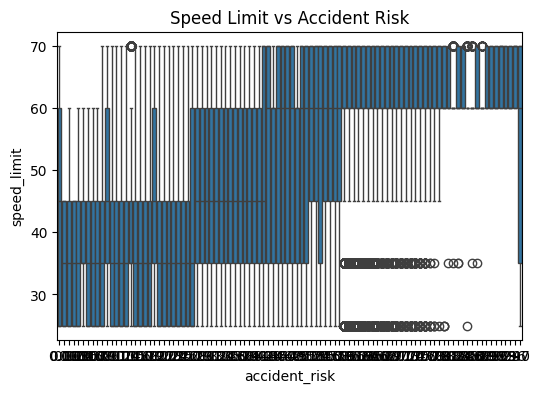

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x='accident_risk', y='speed_limit', data=train_df)
plt.title("Speed Limit vs Accident Risk")
plt.show()


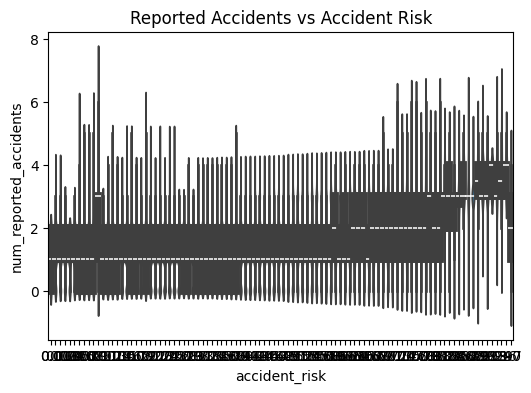

In [25]:
plt.figure(figsize=(6,4))
sns.violinplot(x='accident_risk', y='num_reported_accidents', data=train_df)
plt.title("Reported Accidents vs Accident Risk")
plt.show()


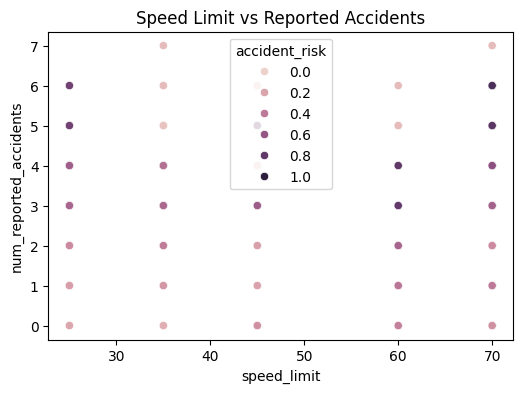

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='speed_limit',
    y='num_reported_accidents',
    hue='accident_risk',
    data=train_df
)
plt.title("Speed Limit vs Reported Accidents")
plt.show()


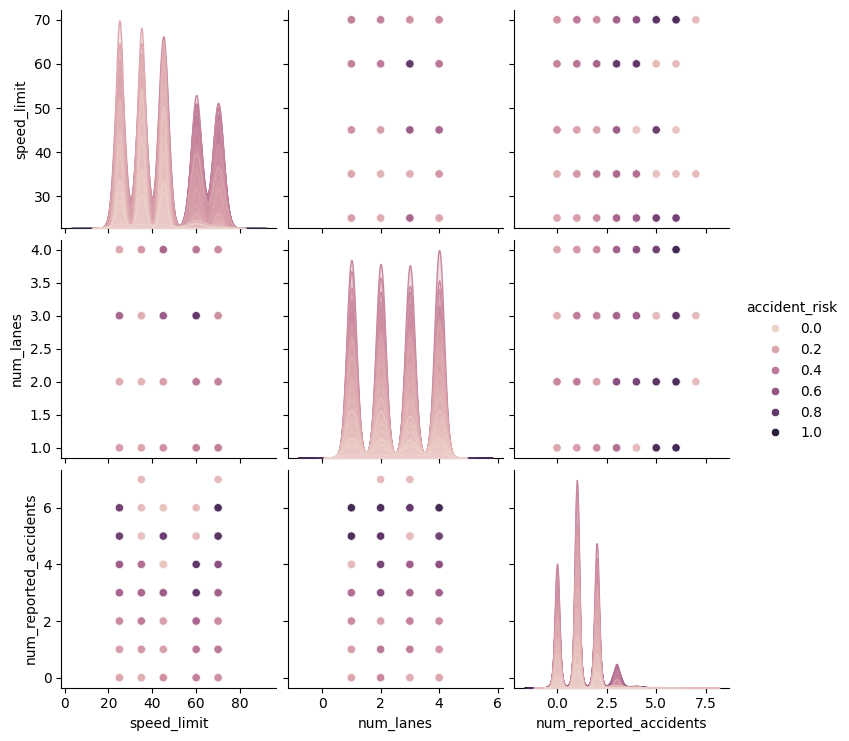

In [27]:
sns.pairplot(
    train_df[['speed_limit', 'num_lanes',
              'num_reported_accidents', 'accident_risk']],
    hue='accident_risk'
)
plt.show()


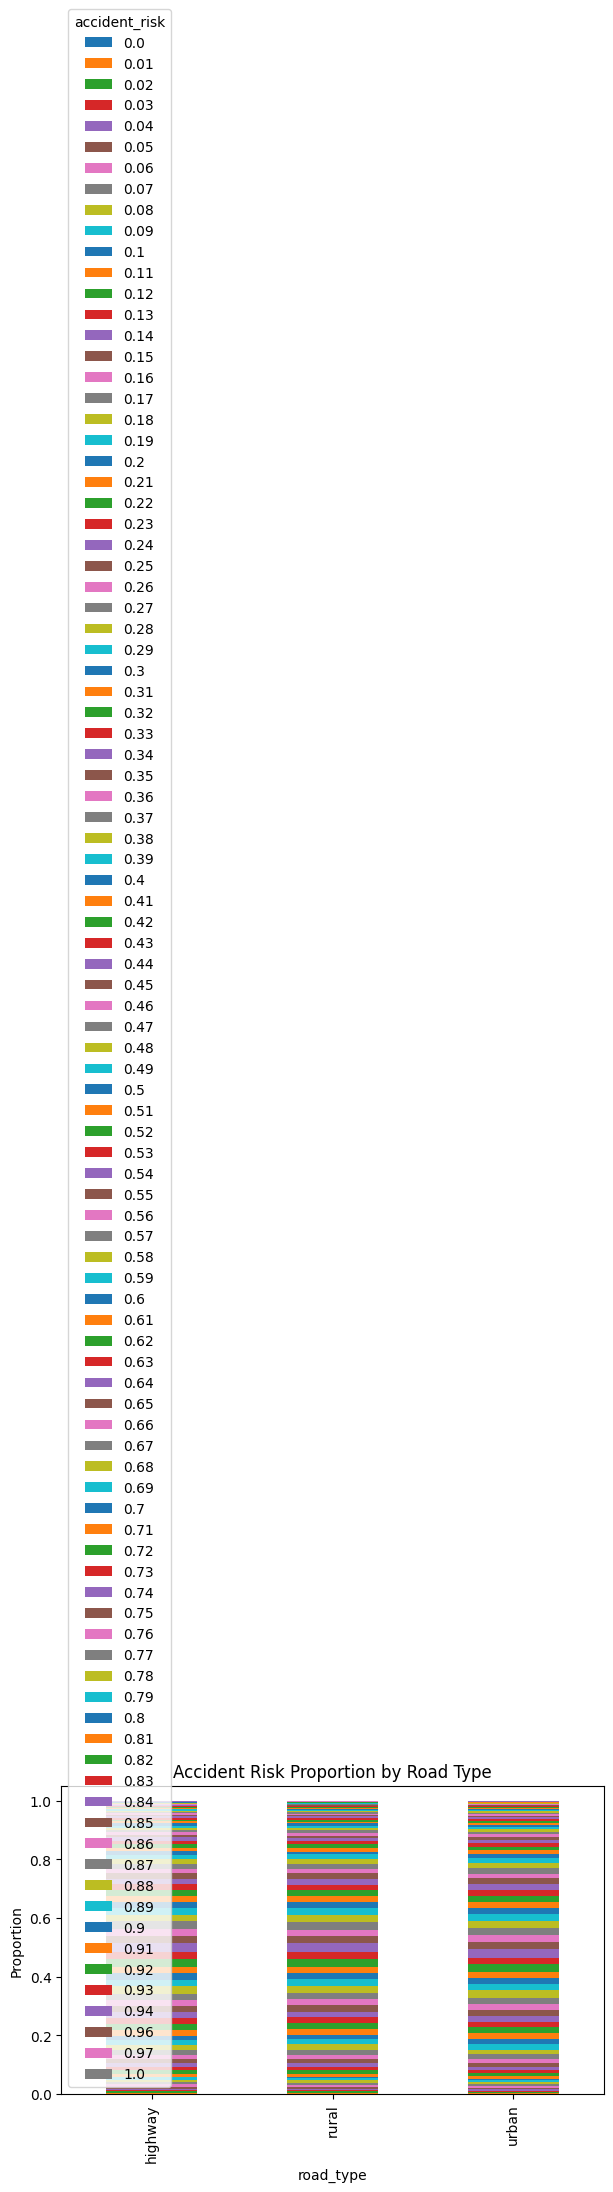

In [28]:
risk_by_road = pd.crosstab(
    train_df['road_type'],
    train_df['accident_risk'],
    normalize='index'
)

risk_by_road.plot(kind='bar', stacked=True, figsize=(7,4))
plt.title("Accident Risk Proportion by Road Type")
plt.ylabel("Proportion")
plt.show()


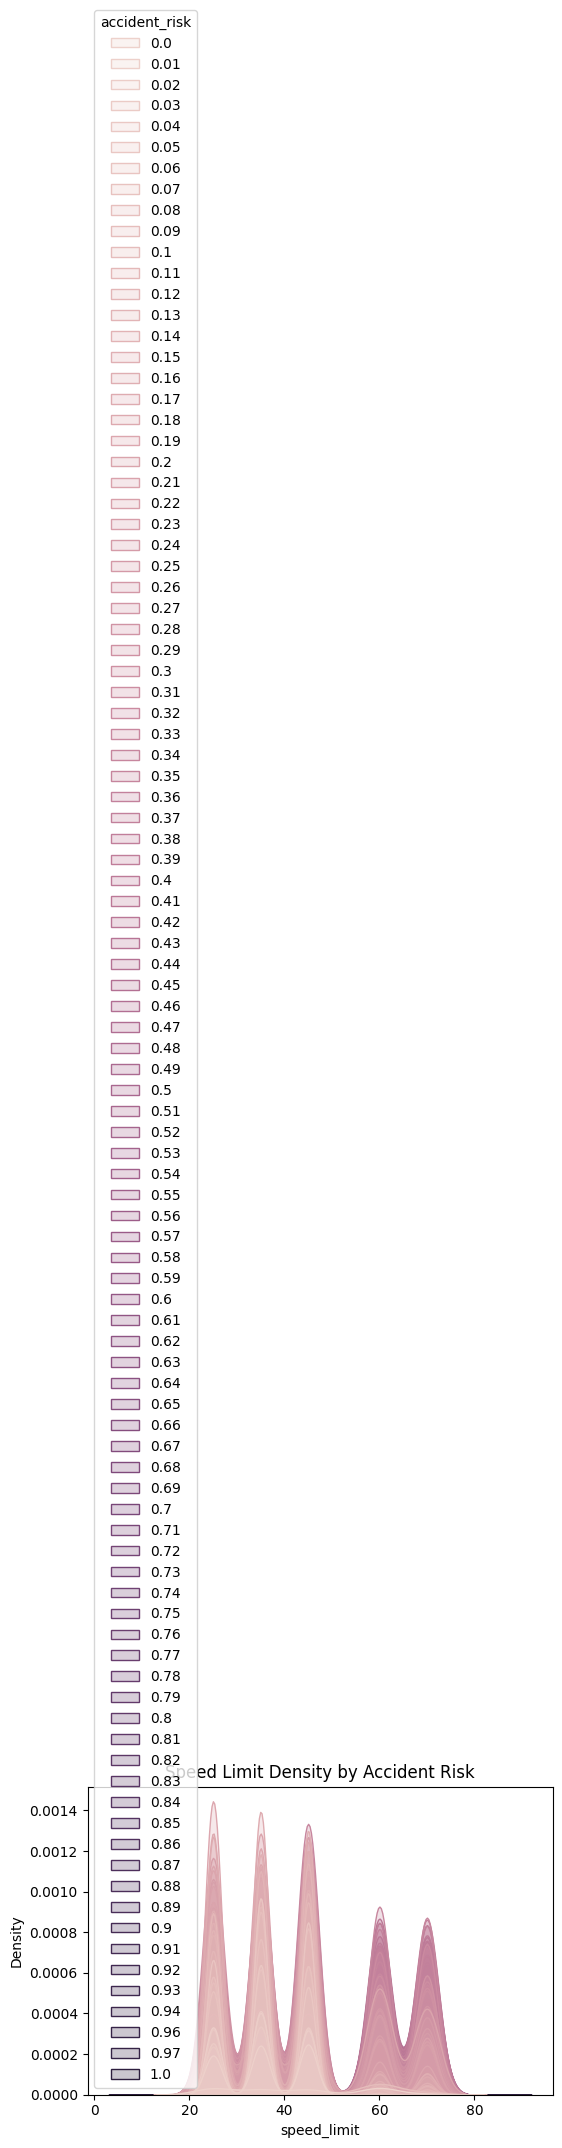

In [29]:
plt.figure(figsize=(6,4))
sns.kdeplot(
    data=train_df,
    x='speed_limit',
    hue='accident_risk',
    fill=True
)
plt.title("Speed Limit Density by Accident Risk")
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [31]:
X = train_df.drop(columns=['accident_risk'])
y = train_df['accident_risk']


In [32]:
label_encoders = {}

for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "KNN Regressor": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(max_iter=500, random_state=42)
}


In [35]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, rmse, r2 * 100])


In [36]:
results_df = pd.DataFrame(
    results,
    columns=['Model', 'RMSE', 'R2 (%)']
).sort_values(by='R2 (%)', ascending=False)

results_df


,Model,RMSE,R2 (%)
5,Gradient Boosting,0.057040,88.216905
4,Random Forest,0.058030,87.804258
3,Decision Tree,0.082200,75.529222
1,Ridge Regression,0.088444,71.670736
0,Linear Regression,0.088444,71.670728
7,KNN Regressor,0.158596,8.906871
2,Lasso Regression,0.162713,4.116509
6,Support Vector Regressor,0.166201,-0.038868
8,MLP Regressor,3.736251,-50455.810117


## Thank you..pls upvote!!!!